# PyTorch basics: syntax, torch.cuda and torch.autograd</b></h2>

<p style="align: center;"><img src="https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png" width=400 height=100></p>

<h3 style="text-align: center;"><b>Intro</b></h3>

We will use PyTorch bacause it's been actively developed and supported by the community and [Facebook(Meta) Research](https://research.facebook.com/).

<h3 style="text-align: center;"><b>Installation</b></h3>

The detailed instruction on how to install PyTorch you can find on the [official PyTorch website](https://pytorch.org/).

In [ ]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

## Syntax

In [ ]:
import torch

Some facts about PyTorch:  
- handy `torch.nn` and `torchvision` modules for fast neural network prototyping
- even faster than TensorFlow on some tasks
- allows to use GPU easily

At its core, PyTorch provides two main features:

- An n-dimensional Tensor, similar to numpy but can run on GPUs
- Automatic differentiation for building and training neural networks

If PyTorch was a formula, it would be:  

$$PyTorch = NumPy + CUDA + Autograd$$

(CUDA - [wiki](https://en.wikipedia.org/wiki/CUDA))

Let's see how we can use PyTorch to operate with vectors and tensors.  

Recall that **a tensor** is a multidimensional vector, e.g. :  

`x = np.array([1,2,3])` -- a vector = a tensor with 1 dimension (to be more precise: `(3,)`)  
`y = np.array([[1, 2, 3], [4, 5, 6]])` -- a matrix = a tensor with 2 dimensions (`(2, 3)` in this case)  
`z = np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]],  
               [[1, 2, 3], [4, 5, 6], [7, 8, 9]],  
               [[1, 2, 3], [4, 5, 6], [7, 8, 9]]])` -- "a cube" (3, 3, 3) = a tensor with 3 dimensions (`(3, 3, 3)` in this case)

One real example of 3-dimensional tensor is **an image**, it has 3 dimensions: `height`, `width` and the `channel depth` (= 3 for color images, 1 for a greyscale). You can think of it as of parallelepiped consisting of the real numbers.

In PyTorch we will use `torch.Tensor` (`FloatTensor`, `IntTensor`, `ByteTensor`) for all the computations.

All tensor types:

In [ ]:
torch.HalfTensor      # 16 бит, floating point
torch.FloatTensor     # 32 бита, floating point
torch.DoubleTensor    # 64 бита, floating point

torch.ShortTensor     # 16 бит, integer, signed
torch.IntTensor       # 32 бита, integer, signed
torch.LongTensor      # 64 бита, integer, signed

torch.CharTensor      # 8 бит, integer, signed
torch.ByteTensor      # 8 бит, integer, unsigned

We will use only `torch.FloatTensor()` and `torch.IntTensor()`.

* Создание тензора

In [ ]:
a = torch.FloatTensor([1, 2])
print(a)
print(a.shape)
print(a.size())

In [ ]:
b = torch.FloatTensor([[1,2,3], [4,5,6]])
print(b)
print(b.shape)
print(b.shape[1])

In [ ]:
x = torch.FloatTensor(2,3,4)
print(x)
print(x.size())

In [ ]:
x = torch.FloatTensor(100)
print(x)

In [ ]:
x = torch.IntTensor(45, 57, 14, 2)
print(x)
print(x.size())

**Note:** при создании `torch.Tensor` память инициализируется случайным "мусором"

In [ ]:
torch.manual_seed(36)
x = torch.IntTensor(3, 2, 4)
x

Заполняем тензор нулями

In [ ]:
x1 = torch.FloatTensor(3, 2, 4)
x1.zero_()
x2 = torch.zeros(3, 2, 4)
x3 = torch.zeros_like(x1)

assert torch.allclose(x1, x2) and torch.allclose(x1, x3)
x1

In [ ]:
torch.allclose?

- `zero_` делает inplace (все методы с подчеркиванием)
- `zeros` создает измененную копию (все методы без подчеркивания)

Заполнение нормальным распределением

In [ ]:
x = torch.randn((2,3))                # Normal(0, 1) with shape
x

In [ ]:
x.random_(0, 10)                      # discrete U[0, 10]

In [ ]:
x.uniform_(0, 1)                      # U[0, 1]

In [ ]:
x.normal_(mean=0, std=1)              # Normal with mean and std

In [ ]:
x.bernoulli_(p=0.5)                   # bernoulli with parameter p

## Numpy -> Torch

Все основные функции имеют схожий интерфейс с Numpy

https://github.com/torch/torch7/wiki/Torch-for-Numpy-users

`np.reshape()` == `torch.view()`:

In [ ]:
b = torch.randn((2,3,4))

In [ ]:
b, b.stride()

In [ ]:
b.view(12, 2), b.view(12, 2).stride()

**Note:** `torch.view()` создает новый тензор

In [ ]:
b.view(-1)

In [ ]:
b

In [ ]:
b.reshape(-1) # if you need a copy use clone() if you need the same storage use view(). The semantics of reshape() are that it may or may not share the storage and you don't know beforehand.

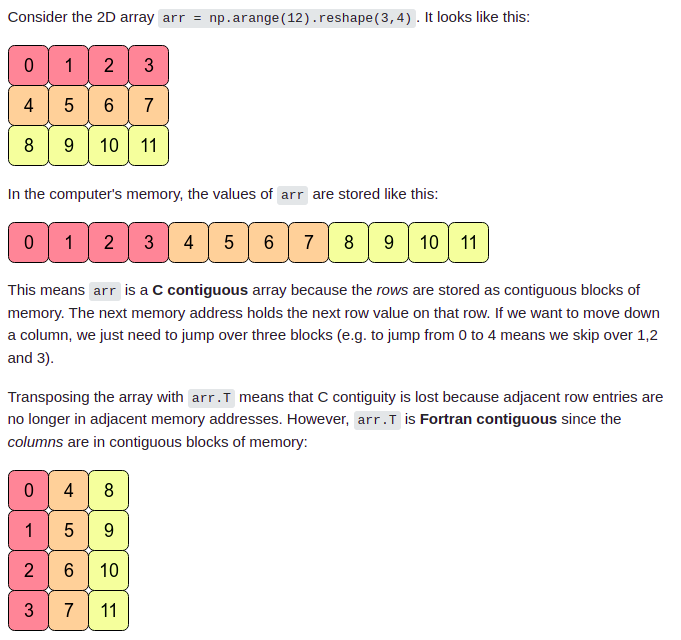

### Смена типа тензора:

In [ ]:
a = torch.FloatTensor([1.9, 3.2, -7])

In [ ]:
torch.IntTensor()

In [ ]:
a.type_as(torch.IntTensor())

In [ ]:
a.to(torch.int32)

In [ ]:
a.type_as(torch.ByteTensor())

In [ ]:
a = a.to(torch.uint8)

In [ ]:
a

### Индексация совпадает с  `NumPy`:

In [ ]:
a = torch.FloatTensor([[100, 20, 35], [15, 163, 534], [52, 90, 66]])
a

In [ ]:
a[0, 0]

In [ ]:
a[0:2, 1]

### Арифметические операции:  

| Operator | Analogue |
|:-:|:-:|
|`+`| `torch.add()` |
|`-`| `torch.sub()` |
|`*`| `torch.mul()` |
|`/`| `torch.div()` |

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [ ]:
a + b

In [ ]:
a.add(b)

In [ ]:
b = -a
b

In [ ]:
a + b

In [ ]:
a - b

In [ ]:
a

In [ ]:
a.sub(b) # copy

In [ ]:
a

In [ ]:
a.sub_(b) # inplace

In [ ]:
a

In [ ]:
a * b

In [ ]:
a.mul(b)

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [ ]:
a / b

In [ ]:
a.div(b)

### Сравнение:

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [ ]:
a == b

In [ ]:
a != b

In [ ]:
a < b

In [ ]:
a > b

### Функции

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])

In [ ]:
a.sin()

In [ ]:
torch.sin(a)

In [ ]:
import numpy as np

In [ ]:
np.sin(a)

In [ ]:
a.log()

### The sum, mean, max, min:

In [ ]:
a.sum(dim=1) # вместо axis используем dim

In [ ]:
torch.sum(a, dim=1)

In [ ]:
np.sum(a.numpy(), axis=1)

In [ ]:
a.mean()

In [ ]:
torch.max(a, dim = 1)

In [ ]:
a

In [ ]:
?torch.min

In [ ]:
a.min(dim=1)

In [ ]:
a.min()

## Matrix operations:

### Transpose a tensor:

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
a

In [ ]:
a.numpy().T

In [ ]:
a.t_()

In [ ]:
a

In [ ]:
a.T

In [ ]:
a

### Dot product of vectors:

In [ ]:
a = torch.FloatTensor([1, 2, 3, 4, 5, 6])
b = torch.FloatTensor([-1, -2, -4, -6, -8, -10])

In [ ]:
a.dot(b)

In [ ]:
a @ b

In [ ]:
a.shape, b.shape

In [ ]:
a @ b

In [ ]:
type(a)

In [ ]:
type(b)

In [ ]:
type(a @ b)

### Matrix product:

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [ ]:
a * b

In [ ]:
a.mm(b)

In [ ]:
a @ b

In [ ]:
torch.bmm(a.unsqueeze(0), b.unsqueeze(0)).shape

In [ ]:
a[:, None]

Remain unchanged:

In [ ]:
a

In [ ]:
b

In [ ]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1], [-10], [100]])

In [ ]:
print(a.shape, b.shape)

In [ ]:
a @ b

If we unroll the tensor `b` in an array (`torch.view(-1)`) the multiplication would be like with the column:

In [ ]:
b

In [ ]:
a

In [ ]:
b.view(-1)

In [ ]:
b.view(-1).shape

In [ ]:
a @ b.view(-1)

In [ ]:
a @ b

In [ ]:
a.mv(b.view(-1))

In [ ]:
torch.mv

In [ ]:
y = torch.Tensor(2, 3, 4, 5)
z = torch.Tensor(2, 3, 5, 6)
(y @ z).shape

**From NumPu to PyTorch conversion**:

In [ ]:
import numpy as np

a = np.random.rand(3, 3)
a

In [ ]:
b = torch.from_numpy(a)
b

**NOTE!** `a` and `b` have the same data storage, so the changes in one tensor will lead to the changes in another:

In [ ]:
b -= b
b

In [ ]:
a

**From PyTorch to NumPy conversion:**

In [ ]:
a = torch.FloatTensor(2, 3, 4)
a

In [ ]:
type(a)

In [ ]:
x = a.numpy()
x

In [ ]:
x.shape

In [ ]:
type(x)

In [ ]:
x -= x

In [ ]:
x

Let's write the `forward_pass(X, w)` for a single neuron (activation = sigmoid) using PyTorch:

In [ ]:
def forward_pass(X, w):
    return torch.sigmoid(X @ w)

In [ ]:
X = torch.FloatTensor([[-5, 5], [2, 3], [1, -1]])
w = torch.FloatTensor([[-0.5], [2.5]])
result = forward_pass(X, w)
print('result: {}'.format(result))

## <h1 style="text-align: center;"><a href="https://ru.wikipedia.org/wiki/CUDA">CUDA</a></h3>

[CUDA documentation](https://docs.nvidia.com/cuda/)

We can use both CPU (Central Processing Unit) and GPU (Graphical Processing Unit) to make the computations with PyTorch. We can switch between them easily, this is one of the most important things in PyTorch framework.

In [ ]:
x = torch.FloatTensor(1024, 10024).uniform_()
x

In [ ]:
x.is_cuda

Place a tensor on GPU (GPU memory is used):

In [ ]:
!nvidia-smi

In [ ]:
x = x.cuda()

In [ ]:
!nvidia-smi

In [ ]:
x = x.cpu()
!nvidia-smi

In [ ]:
torch.cuda.empty_cache()
!nvidia-smi

In [ ]:
device = torch.device("cuda")
x = x.to(device)
x

Let's multiply two tensors on GPU and then move the result on the CPU:

In [ ]:
a = torch.FloatTensor(10000, 10000).uniform_()
b = torch.FloatTensor(10000, 10000).uniform_()
c = a.cuda().mul(b.cuda()).cpu()

In [ ]:
c

In [ ]:
a = a.cuda()

In [ ]:
a

Tensors placed on CPU and tensors placed on GPU are unavailable for each other:

In [ ]:
a = torch.FloatTensor(10000, 10000).uniform_().cpu()
b = torch.FloatTensor(10000, 10000).uniform_().cuda()

In [ ]:
a + b

Example of working with GPU:

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

In [ ]:
x = torch.FloatTensor(5, 5, 5).uniform_()

# check for CUDA availability (NVIDIA GPU)
if torch.cuda.is_available():
    # get the CUDA device name
    device = torch.device('cuda')          # CUDA-device object
    y = torch.ones_like(x, device=device)  # create a tensor on GPU
    x = x.to(device)                       # or just `.to("cuda")`
    z = x + y
    print(z)
    # you can set the type while `.to` operation
    print(z.to("cpu", torch.double))

### Automatic differenciation

PyTorch позволяет динамически создавать граф вычислений, который может эффективно исполняться на GPUs.

In [ ]:
# chose device automaticaly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Для переменных мы можем указать следует ли для неё вычислять градиент, используя флаг `requires_grad`.

In [ ]:
param = torch.rand(2, requires_grad=True)
data = torch.rand(2, requires_grad=False)
print(param, data)

In [ ]:
# we can compute gradient only for floats and complex types
data_long = torch.tensor([1], requires_grad=True)

In [ ]:
# set requires grad

data.requires_grad_(True)

print(f"The var data with required grad - {data}")

data.requires_grad_(False)

print(f"The var data without required grad - {data}")

Рассмотрим, как вычислить производные с помощью PyTorch на примере функции.


$$
f(\mathbf{x}) = ||  A \mathbf{x}  + b - \mathbf{y} ||_2^2
$$

$$
 \frac{\partial f}{\partial \mathbf{b}} = 2 (A \mathbf{x}  + b - \mathbf{y})
$$

$$
 \frac{\partial f}{\partial \mathbf{x}} = 2 (A \mathbf{x}  + b - \mathbf{y}) A
$$

$$
 \frac{\partial f}{\partial \mathbf{A}} = 2 (A \mathbf{x}  + b - \mathbf{y})x^\top
$$



In [ ]:
def f(x, y, A, b):
  return torch.norm((A @ x + b - y ), p=2)**2

def dfdb(x, y, A, b):
  return 2 * (A @ x + b - y )

def dfdx(x, y, A, b):
  return 2 * (A @ x + b - y ) @ A

def dfda(x, y, A, b):
  return torch.outer(2 * (A @ x + b - y), x)


In [ ]:
# variables

x = torch.rand(3, requires_grad=True)
y = torch.rand(3, requires_grad=True)
b = torch.rand(3, requires_grad=True)
A = torch.rand((3, 3), requires_grad=True)

In [ ]:
# want to turn of any grad related computations

with torch.no_grad():
  val = f(x, y, A, b)
  d_b = dfdb(x, y, A, b)
  d_x = dfdx(x, y, A, b)
  d_a = dfda(x, y, A, b)

In [ ]:
# what if we try to compute backward when we turn of grad computations

with torch.no_grad():
  val = f(x, y, A, b)

val.backward()

In [ ]:
val = f(x, y, A, b)
val.backward()

In [ ]:
for v, g in zip([x, A, b], [d_x, d_a, d_b]):
  print(torch.norm(v.grad - g))

In [ ]:
# can we call backward twice?

val.backward?

In [ ]:
# what if we do we same thing again?
val = f(x, y, A, b)
val.backward()

In [ ]:
for v, g in zip([x, A, b], [d_x, d_a, d_b]):
  print(f"The diff between the autograd and the analytical one \t {torch.norm(v.grad - g)}")
  print(f"Has it been doubled \t {torch.norm(v.grad - 2*g) < 1e-8}")

In [ ]:
def set_zero_grad(vars):
  for var in vars:
    if var.grad is not None:
      var.grad.zero_()

In [ ]:
set_zero_grad([A, b, x, y])

In [ ]:
val = f(x, y, A, b)
val.backward()

for v, g in zip([x, A, b], [d_x, d_a, d_b]):
  print(torch.norm(v.grad - g))


### Custom gradient

Что, если нам хочется релизовать кастомный градиент для произвольной функции.

Зачем?

 - Мы можем знать лучший способ посчитать градиент, чем делаль бэкпроп для суперпозиции элементарных функций
 - Можем реализовать численно более устойчивый метод
 - Можем использовать функции из внешних библиотек

Рассмотрим сигмоиду:

$$
  \sigma(x) = \frac{1}{1+e^{-x}}
$$

Если честно распишем суперпозицию функций, то получим:

$$
  \sigma(x) = f_1 \odot f_2  \odot f_3 \odot f_4(x), where
$$

$$
f_1 = \frac{1}{u}, f_2 = 1 + u, f_3 = \exp(u), f_4 = -u
$$

Тогда:

$$
\frac{\partial \sigma}{\partial x} = \frac{\partial \sigma}{\partial f_2}\frac{\partial f_2}{\partial f_3}
\frac{\partial f_3}{\partial f_4}
\frac{\partial f_4}{\partial x}
$$

Но зная как устроена производная можно упростить:

$$
\frac{\partial \sigma}{\partial x} = \sigma(x)(1 - \sigma(x))
$$

Вручную задать градиени функции в библиотеке PyTorch можно создав дочерний класс от `torch.autograd.Function`.

In [ ]:
class MySigmoid(torch.autograd.Function):
  @staticmethod
  def forward(ctx, x):
    val = 1/(1 + torch.exp(-x))
    ctx.val = val
    return val

  @staticmethod
  def backward(ctx, grad_output):
    val = ctx.val
    return grad_output*val*(1-val)

In [ ]:
# the function that compare the numerical and the analytical gradient
from torch.autograd import gradcheck

In [ ]:
sigmoid = MySigmoid.apply
x = torch.rand(2, requires_grad=True)
print(gradcheck(sigmoid, x, eps=1e-4, atol=1e-3))

# be sure to use double for better approximation
x = torch.rand(2, requires_grad=True).double()
print(gradcheck(sigmoid, x, eps=1e-6, atol=1e-4))

In [ ]:
def sum_sigmoid(x):
  return torch.sum(sigmoid(x))

PyTorch умеет считать матрицу Якоби или матрицу Гессе для заданной функции.

In [ ]:
from torch.autograd.functional import hessian, jacobian

In [ ]:
jacobian(sigmoid, x)

In [ ]:
hessian(sum_sigmoid, x)

### Нелинейная регрессия

Модель данных:
$$
t = x^4 + 10x^2 + 1-x + \varepsilon, \varepsilon \sim \mathcal{N} (0, 5)
$$

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
#generate data
N = 100
x = np.linspace(-3, 3, N)
t = x**4 - 10*x**2 + 10 * x + np.random.normal(size=N, scale=5)
plt.figure(figsize=(10, 10))
plt.plot(x, t, "r.")
plt.grid()
plt.show()

t = torch.from_numpy(t)
x = torch.from_numpy(x)

In [ ]:
degree = 5

def model(x, params):
  out = None
  for i, param in enumerate(params):
    if out is None:
      out = param*x**i
    else:
      out += param*x**i
  return out

In [ ]:
params = torch.zeros(degree, requires_grad=True)

In [ ]:
def cost(params):
    y = model(x, params)
    return (1.0 / N) * torch.sum((y - t) ** 2)

In [ ]:
params.grad = torch.FloatTensor(5)

In [ ]:
# Import tensorboard logger from PyTorch
from torch.utils.tensorboard import SummaryWriter

# Load tensorboard extension for Jupyter Notebook, only need to start TB in the notebook
%load_ext tensorboard

In [ ]:
num_epochs = 100
learning_rate = 1e-5

writer = SummaryWriter('runs')
global_step = 0

for i in range(num_epochs):
    loss = cost(params)
    loss.backward()

    if i % 1 == 0:
        print(f"i: {i:<5d} loss: {loss.item():.4f}")
        writer.add_scalar('training_loss',
                          loss.item(),
                          global_step = global_step)
        global_step += 1

    with torch.no_grad():
      params -= learning_rate * params.grad
      params.grad.zero_()
      # update values


print(params)
w = params.detach().cpu().numpy()

In [ ]:
y = model(x, params).detach()

In [ ]:
%tensorboard --logdir ./runs/

In [ ]:
plt.plot(x, t, "r.")
plt.plot(x, y, "b-")

<h3 style="text-align: center;">Further reading:<b></b></h3>

*1). Official PyTorch tutorials: https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py*

*2). arXiv article about the deep learning frameworks comparison: https://arxiv.org/pdf/1511.06435.pdf*

*3). Useful repo with different tutorials: https://github.com/yunjey/pytorch-tutorial*

*4). Facebook AI Research (main contributor of PyTorch) website: https://facebook.ai/developers/tools*

### Optimization

In this tutorial, we will review techniques for optimization and initialization of neural networks. When increasing the depth of neural networks, there are various challenges we face. Most importantly, we need to have a stable gradient flow through the network, as otherwise, we might encounter vanishing or exploding gradients. This is why we will take a closer look at the following concepts: initialization and optimization.

In the first half of the notebook, we will review different initialization techniques, and go step by step from the simplest initialization to methods that are nowadays used in very deep networks. In the second half, we focus on optimization comparing the optimizers SGD, SGD with Momentum, and Adam.

Let's start with importing our standard libraries:

In [ ]:
## Standard libraries
import os
import json
import math
import numpy as np
import copy

## Imports for plotting
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
import seaborn as sns
sns.set()

## Progress bar
from tqdm.notebook import tqdm

## PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim

We will use the same `set_seed` function as in Tutorial 3, as well as the path variables `DATASET_PATH` and `CHECKPOINT_PATH`. Adjust the paths if necessary.

In [ ]:
# Path to the folder where the datasets are/should be downloaded (e.g. MNIST)
DATASET_PATH = "../data"
# Path to the folder where the pretrained models are saved
CHECKPOINT_PATH = "../saved_models/tutorial4"

# Function for setting the seed
def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
set_seed(42)

# Ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Fetching the device that will be used throughout this notebook
device = torch.device("cpu") if not torch.cuda.is_available() else torch.device("cuda:0")
print("Using device", device)

In the last part of the notebook, we will train models using three different optimizers. The pretrained models for those are downloaded below.

In [ ]:
import urllib.request
from urllib.error import HTTPError
# Github URL where saved models are stored for this tutorial
base_url = "https://raw.githubusercontent.com/phlippe/saved_models/main/tutorial4/"
# Files to download
pretrained_files = ["FashionMNIST_SGD.config",    "FashionMNIST_SGD_results.json",    "FashionMNIST_SGD.tar",
                    "FashionMNIST_SGDMom.config", "FashionMNIST_SGDMom_results.json", "FashionMNIST_SGDMom.tar",
                    "FashionMNIST_Adam.config",   "FashionMNIST_Adam_results.json",   "FashionMNIST_Adam.tar"   ]
# Create checkpoint path if it doesn't exist yet
os.makedirs(CHECKPOINT_PATH, exist_ok=True)

# For each file, check whether it already exists. If not, try downloading it.
for file_name in pretrained_files:
    file_path = os.path.join(CHECKPOINT_PATH, file_name)
    if not os.path.isfile(file_path):
        file_url = base_url + file_name
        print(f"Downloading {file_url}...")
        try:
            urllib.request.urlretrieve(file_url, file_path)
        except HTTPError as e:
            print("Something went wrong. Please try to download the file from the GDrive folder, or contact the author with the full output including the following error:\n", e)

## Preparation

Throughout this notebook, we will use a deep fully connected network, similar to our previous tutorial. We will also again apply the network to FashionMNIST, so you can relate to the results of Tutorial 3.
We start by loading the FashionMNIST dataset:

In [ ]:
from torchvision.datasets import FashionMNIST
from torchvision import transforms

# Transformations applied on each image => first make them a tensor, then normalize them with mean 0 and std 1
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.2861,), (0.3530,))
                               ])

# Loading the training dataset. We need to split it into a training and validation part
train_dataset = FashionMNIST(root=DATASET_PATH, train=True, transform=transform, download=True)
train_set, val_set = torch.utils.data.random_split(train_dataset, [50000, 10000])

# Loading the test set
test_set = FashionMNIST(root=DATASET_PATH, train=False, transform=transform, download=True)

# We define a set of data loaders that we can use for various purposes later.
# Note that for actually training a model, we will use different data loaders
# with a lower batch size.
train_loader = data.DataLoader(train_set, batch_size=1024, shuffle=True, drop_last=False)
val_loader = data.DataLoader(val_set, batch_size=1024, shuffle=False, drop_last=False)
test_loader = data.DataLoader(test_set, batch_size=1024, shuffle=False, drop_last=False)

In comparison to the previous tutorial, we have changed the parameters of the normalization transformation `transforms.Normalize`. The normalization is now designed to give us an expected mean of 0 and a standard deviation of 1 across pixels. This will be particularly relevant for the discussion about initialization we will look at below, and hence we change it here. It should be noted that in most classification tasks, both normalization techniques (between -1 and 1 or mean 0 and stddev 1) have shown to work well.
We can calculate the normalization parameters by determining the mean and standard deviation on the original images:

In [ ]:
print("Mean", (train_dataset.data.float() / 255.0).mean().item())
print("Std", (train_dataset.data.float() / 255.0).std().item())

We can verify the transformation by looking at the statistics of a single batch:

In [ ]:
imgs, _ = next(iter(train_loader))
print(f"Mean: {imgs.mean().item():5.3f}")
print(f"Standard deviation: {imgs.std().item():5.3f}")
print(f"Maximum: {imgs.max().item():5.3f}")
print(f"Minimum: {imgs.min().item():5.3f}")

Note that the maximum and minimum are not 1 and -1 anymore, but shifted towards the positive values. This is because FashionMNIST contains a lot of black pixels, similar to MNIST.

Next, we create a linear neural network. We use the same setup as in the previous tutorial.

In [ ]:
class BaseNetwork(nn.Module):

    def __init__(self, act_fn, input_size=784, num_classes=10, hidden_sizes=[512, 256, 256, 128]):
        """
        Inputs:
            act_fn - Object of the activation function that should be used as non-linearity in the network.
            input_size - Size of the input images in pixels
            num_classes - Number of classes we want to predict
            hidden_sizes - A list of integers specifying the hidden layer sizes in the NN
        """
        super().__init__()

        # Create the network based on the specified hidden sizes
        layers = []
        layer_sizes = [input_size] + hidden_sizes
        for layer_index in range(1, len(layer_sizes)):
            layers += [nn.Linear(layer_sizes[layer_index-1], layer_sizes[layer_index]),
                       act_fn]
        layers += [nn.Linear(layer_sizes[-1], num_classes)]
        self.layers = nn.ModuleList(layers) # A module list registers a list of modules as submodules (e.g. for parameters)

        self.config = {"act_fn": act_fn.__class__.__name__, "input_size": input_size, "num_classes": num_classes, "hidden_sizes": hidden_sizes}

    def forward(self, x):
        x = x.view(x.size(0), -1)
        for l in self.layers:
            x = l(x)
        return x

For the activation functions, we make use of PyTorch's `torch.nn` library instead of implementing ourselves. However, we also define an `Identity` activation function. Although this activation function would significantly limit the network's modeling capabilities, we will use it in the first steps of our discussion about initialization (for simplicity).

In [ ]:
class Identity(nn.Module):
    def forward(self, x):
        return x

act_fn_by_name = {
    "tanh": nn.Tanh,
    "relu": nn.ReLU,
    "identity": Identity
}

Finally, we define a few plotting functions that we will use for our discussions. These functions help us to (1) visualize the weight/parameter distribution inside a network, (2) visualize the gradients that the parameters at different layers receive, and (3) the activations, i.e. the output of the linear layers. The detailed code is not important, but feel free to take a closer look if interested.

## Initialization

Before starting our discussion about initialization, it should be noted that there exist many very good blog posts about the topic of neural network initialization (for example [deeplearning.ai](https://www.deeplearning.ai/ai-notes/initialization/), or a more [math-focused blog post](https://pouannes.github.io/blog/initialization/#mjx-eqn-eqfwd_K)). In case something remains unclear after this tutorial, we recommend skimming through these blog posts as well.

When initializing a neural network, there are a few properties we would like to have. First, the variance of the input should be propagated through the model to the last layer, so that we have a similar standard deviation for the output neurons. If the variance would vanish the deeper we go in our model, it becomes much harder to optimize the model as the input to the next layer is basically a single constant value. Similarly, if the variance increases, it is likely to explode (i.e. head to infinity) the deeper we design our model. The second property we look out for in initialization techniques is a gradient distribution with equal variance across layers. If the first layer receives much smaller gradients than the last layer, we will have difficulties in choosing an appropriate learning rate.

As a starting point for finding a good method, we will analyze different initialization based on our linear neural network with no activation function (i.e. an identity). We do this because initializations depend on the specific activation function used in the network, and we can adjust the initialization schemes later on for our specific choice.

In [ ]:
model = BaseNetwork(act_fn=nn.Tanh()).to(device)


## Optimization

Besides initialization, selecting a suitable optimization algorithm can be an important choice for deep neural networks. Before taking a closer look at them, we should define code for training the models. Most of the following code is copied from the previous tutorial, and only slightly altered to fit our needs.

In [ ]:
def _get_config_file(model_path, model_name):
    return os.path.join(model_path, model_name + ".config")

def _get_model_file(model_path, model_name):
    return os.path.join(model_path, model_name + ".tar")

def _get_result_file(model_path, model_name):
    return os.path.join(model_path, model_name + "_results.json")

def load_model(model_path, model_name, net=None):
    config_file, model_file = _get_config_file(model_path, model_name), _get_model_file(model_path, model_name)
    assert os.path.isfile(config_file), f"Could not find the config file \"{config_file}\". Are you sure this is the correct path and you have your model config stored here?"
    assert os.path.isfile(model_file), f"Could not find the model file \"{model_file}\". Are you sure this is the correct path and you have your model stored here?"
    with open(config_file, "r") as f:
        config_dict = json.load(f)
    if net is None:
        act_fn_name = config_dict["act_fn"].pop("name").lower()
        assert act_fn_name in act_fn_by_name, f"Unknown activation function \"{act_fn_name}\". Please add it to the \"act_fn_by_name\" dict."
        act_fn = act_fn_by_name[act_fn_name]()
        net = BaseNetwork(act_fn=act_fn, **config_dict)
    net.load_state_dict(torch.load(model_file))
    return net

def save_model(model, model_path, model_name):
    config_dict = model.config
    os.makedirs(model_path, exist_ok=True)
    config_file, model_file = _get_config_file(model_path, model_name), _get_model_file(model_path, model_name)
    with open(config_file, "w") as f:
        json.dump(config_dict, f)
    torch.save(model.state_dict(), model_file)

def train_model(net, model_name, optim_func, max_epochs=50, batch_size=256, overwrite=False):
    """
    Train a model on the training set of FashionMNIST

    Inputs:
        net - Object of BaseNetwork
        model_name - (str) Name of the model, used for creating the checkpoint names
        max_epochs - Number of epochs we want to (maximally) train for
        patience - If the performance on the validation set has not improved for #patience epochs, we stop training early
        batch_size - Size of batches used in training
        overwrite - Determines how to handle the case when there already exists a checkpoint. If True, it will be overwritten. Otherwise, we skip training.
    """
    file_exists = os.path.isfile(_get_model_file(CHECKPOINT_PATH, model_name))
    if file_exists and not overwrite:
        print(f"Model file of \"{model_name}\" already exists. Skipping training...")
        with open(_get_result_file(CHECKPOINT_PATH, model_name), "r") as f:
            results = json.load(f)
    else:
        if file_exists:
            print("Model file exists, but will be overwritten...")

        # Defining optimizer, loss and data loader
        optimizer =  optim_func(net.parameters())
        loss_module = nn.CrossEntropyLoss()
        train_loader_local = data.DataLoader(train_set, batch_size=batch_size, shuffle=True, drop_last=True, pin_memory=True)

        results = None
        val_scores = []
        train_losses, train_scores = [], []
        best_val_epoch = -1
        for epoch in range(max_epochs):
            ############
            # Training #
            ############
            net.train()
            true_preds, count = 0., 0
            t = tqdm(train_loader_local, leave=False)
            for imgs, labels in t:
                imgs, labels = imgs.to(device), labels.to(device)
                optimizer.zero_grad()
                preds = net(imgs)
                loss = loss_module(preds, labels)
                loss.backward()
                optimizer.step()
                # Record statistics during training
                true_preds += (preds.argmax(dim=-1) == labels).sum().item()
                count += labels.shape[0]
                t.set_description(f"Epoch {epoch+1}: loss={loss.item():4.2f}")
                train_losses.append(loss.item())
            train_acc = true_preds / count
            train_scores.append(train_acc)

            ##############
            # Validation #
            ##############
            val_acc = test_model(net, val_loader)
            val_scores.append(val_acc)
            print(f"[Epoch {epoch+1:2d}] Training accuracy: {train_acc*100.0:05.2f}%, Validation accuracy: {val_acc*100.0:05.2f}%")

            if len(val_scores) == 1 or val_acc > val_scores[best_val_epoch]:
                print("\t   (New best performance, saving model...)")
                save_model(net, CHECKPOINT_PATH, model_name)
                best_val_epoch = epoch

    if results is None:
        load_model(CHECKPOINT_PATH, model_name, net=net)
        test_acc = test_model(net, test_loader)
        results = {"test_acc": test_acc, "val_scores": val_scores, "train_losses": train_losses, "train_scores": train_scores}
        with open(_get_result_file(CHECKPOINT_PATH, model_name), "w") as f:
            json.dump(results, f)

    # Plot a curve of the validation accuracy
    sns.set()
    plt.plot([i for i in range(1,len(results["train_scores"])+1)], results["train_scores"], label="Train")
    plt.plot([i for i in range(1,len(results["val_scores"])+1)], results["val_scores"], label="Val")
    plt.xlabel("Epochs")
    plt.ylabel("Validation accuracy")
    plt.ylim(min(results["val_scores"]), max(results["train_scores"])*1.01)
    plt.title(f"Validation performance of {model_name}")
    plt.legend()
    plt.show()
    plt.close()

    print((f" Test accuracy: {results['test_acc']*100.0:4.2f}% ").center(50, "=")+"\n")
    return results


def test_model(net, data_loader):
    """
    Test a model on a specified dataset.

    Inputs:
        net - Trained model of type BaseNetwork
        data_loader - DataLoader object of the dataset to test on (validation or test)
    """
    net.eval()
    true_preds, count = 0., 0
    for imgs, labels in data_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        with torch.no_grad():
            preds = net(imgs).argmax(dim=-1)
            true_preds += (preds == labels).sum().item()
            count += labels.shape[0]
    test_acc = true_preds / count
    return test_acc

First, we need to understand what an optimizer actually does. The optimizer is responsible to update the network's parameters given the gradients. Hence, we effectively implement a function $w^{t} = f(w^{t-1}, g^{t}, ...)$ with $w$ being the parameters, and $g^{t} = \nabla_{w^{(t-1)}} \mathcal{L}^{(t)}$ the gradients at time step $t$. A common, additional parameter to this function is the learning rate, here denoted by $\eta$. Usually, the learning rate can be seen as the "step size" of the update. A higher learning rate means that we change the weights more in the direction of the gradients, a smaller means we take shorter steps.

As most optimizers only differ in the implementation of $f$, we can define a template for an optimizer in PyTorch below. We take as input the parameters of a model and a learning rate. The function `zero_grad` sets the gradients of all parameters to zero, which we have to do before calling `loss.backward()`. Finally, the `step()` function tells the optimizer to update all weights based on their gradients. The template is setup below:

In [ ]:
class OptimizerTemplate:

    def __init__(self, params, lr):
        self.params = list(params)
        self.lr = lr

    def zero_grad(self):
        ## Set gradients of all parameters to zero
        for p in self.params:
            if p.grad is not None:
                p.grad.detach_() # For second-order optimizers important
                p.grad.zero_()

    @torch.no_grad()
    def step(self):
        ## Apply update step to all parameters
        for p in self.params:
            if p.grad is None: # We skip parameters without any gradients
                continue
            self.update_param(p)

    def update_param(self, p):
        # To be implemented in optimizer-specific classes
        raise NotImplementedError

The first optimizer we are going to implement is the standard Stochastic Gradient Descent (SGD). SGD updates the parameters using the following equation:

$$
\begin{split}
    w^{(t)} & = w^{(t-1)} - \eta \cdot g^{(t)}
\end{split}
$$

As simple as the equation is also our implementation of SGD:

In [ ]:
class SGD(OptimizerTemplate):

    def __init__(self, params, lr):
        super().__init__(params, lr)

    def update_param(self, p):
        p_update = -self.lr * p.grad
        p.add_(p_update) # In-place update => saves memory and does not create computation graph

In the lecture, we also have discussed the concept of momentum which replaces the gradient in the update by an exponential average of all past gradients including the current one:

$$
\begin{split}
    m^{(t)} & = \beta_1 m^{(t-1)} + (1 - \beta_1)\cdot g^{(t)}\\
    w^{(t)} & = w^{(t-1)} - \eta \cdot m^{(t)}\\
\end{split}
$$

Let's also implement it below:

In [ ]:
class SGDMomentum(OptimizerTemplate):

    def __init__(self, params, lr, momentum=0.0):
        super().__init__(params, lr)
        self.momentum = momentum # Corresponds to beta_1 in the equation above
        self.param_momentum = {p: torch.zeros_like(p.data) for p in self.params} # Dict to store m_t

    def update_param(self, p):
        self.param_momentum[p] = (1 - self.momentum) * p.grad + self.momentum * self.param_momentum[p]
        p_update = -self.lr * self.param_momentum[p]
        p.add_(p_update)

Finally, we arrive at Adam. Adam combines the idea of momentum with an adaptive learning rate, which is based on an exponential average of the squared gradients, i.e. the gradients norm. Furthermore, we add a bias correction for the momentum and adaptive learning rate for the first iterations:

$$
\begin{split}
    m^{(t)} & = \beta_1 m^{(t-1)} + (1 - \beta_1)\cdot g^{(t)}\\
    v^{(t)} & = \beta_2 v^{(t-1)} + (1 - \beta_2)\cdot \left(g^{(t)}\right)^2\\
    \hat{m}^{(t)} & = \frac{m^{(t)}}{1-\beta^{t}_1}, \hat{v}^{(t)} = \frac{v^{(t)}}{1-\beta^{t}_2}\\
    w^{(t)} & = w^{(t-1)} - \frac{\eta}{\sqrt{\hat{v}^{(t)}} + \epsilon}\circ \hat{m}^{(t)}\\
\end{split}
$$

Epsilon is a small constant used to improve numerical stability for very small gradient norms. Remember that the adaptive learning rate does not replace the learning rate hyperparameter $\eta$, but rather acts as an extra factor and ensures that the gradients of various parameters have a similar norm.

In [ ]:
class Adam(OptimizerTemplate):

    def __init__(self, params, lr, beta1=0.9, beta2=0.999, eps=1e-8):
        super().__init__(params, lr)
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        self.param_step = {p: 0 for p in self.params} # Remembers "t" for each parameter for bias correction
        self.param_momentum = {p: torch.zeros_like(p.data) for p in self.params}
        self.param_2nd_momentum = {p: torch.zeros_like(p.data) for p in self.params}

    def update_param(self, p):
        self.param_step[p] += 1

        self.param_momentum[p] = (1 - self.beta1) * p.grad + self.beta1 * self.param_momentum[p]
        self.param_2nd_momentum[p] = (1 - self.beta2) * (p.grad)**2 + self.beta2 * self.param_2nd_momentum[p]

        bias_correction_1 = 1 - self.beta1 ** self.param_step[p]
        bias_correction_2 = 1 - self.beta2 ** self.param_step[p]

        p_2nd_mom = self.param_2nd_momentum[p] / bias_correction_2
        p_mom = self.param_momentum[p] / bias_correction_1
        p_lr = self.lr / (torch.sqrt(p_2nd_mom) + self.eps)
        p_update = -p_lr * p_mom

        p.add_(p_update)

### Comparing optimizers on model training

After we have implemented three optimizers (SGD, SGD with momentum, and Adam), we can start to analyze and compare them.
First, we test them on how well they can optimize a neural network on the FashionMNIST dataset. We use again our linear network, this time with a ReLU activation and the kaiming initialization, which we have found before to work well for ReLU-based networks. Note that the model is over-parameterized for this task, and we can achieve similar performance with a much smaller network (for example `100,100,100`). However, our main interest is in how well the optimizer can train *deep* neural networks, hence the over-parameterization.

In [ ]:
base_model = BaseNetwork(act_fn=nn.ReLU(), hidden_sizes=[512,256,256,128])

For a fair comparison, we train the exact same model with the same seed with the three optimizers below. Feel free to change the hyperparameters if you want (however, you have to train your own model then).

In [ ]:
SGD_model = copy.deepcopy(base_model).to(device)
SGD_results = train_model(SGD_model, "FashionMNIST_SGD",
                          lambda params: SGD(params, lr=1e-1),
                          max_epochs=40, batch_size=256)

In [ ]:
SGDMom_model = copy.deepcopy(base_model).to(device)
SGDMom_results = train_model(SGDMom_model, "FashionMNIST_SGDMom",
                             lambda params: SGDMomentum(params, lr=1e-1, momentum=0.9),
                             max_epochs=40, batch_size=256)

In [ ]:
Adam_model = copy.deepcopy(base_model).to(device)
Adam_results = train_model(Adam_model, "FashionMNIST_Adam",
                           lambda params: Adam(params, lr=1e-3),
                           max_epochs=40, batch_size=256)

The result is that all optimizers perform similarly well with the given model. The differences are too small to find any significant conclusion. However, keep in mind that this can also be attributed to the initialization we chose. When changing the initialization to worse (e.g. constant initialization), Adam usually shows to be more robust because of its adaptive learning rate. To show the specific benefits of the optimizers, we will continue to look at some possible loss surfaces in which momentum and adaptive learning rate are crucial.

### Pathological curvatures

A pathological curvature is a type of surface that is similar to ravines and is particularly tricky for plain SGD optimization. In words, pathological curvatures typically have a steep gradient in one direction with an optimum at the center, while in a second direction we have a slower gradient towards a (global) optimum. Let's first create an example surface of this and visualize it:

In [ ]:
def pathological_curve_loss(w1, w2):
    # Example of a pathological curvature. There are many more possible, feel free to experiment here!
    x1_loss = torch.tanh(w1)**2 + 0.01 * torch.abs(w1)
    x2_loss = torch.sigmoid(w2)
    return x1_loss + x2_loss

In [ ]:
def plot_curve(curve_fn, x_range=(-5,5), y_range=(-5,5), plot_3d=False, cmap=cm.viridis, title="Pathological curvature"):
    fig = plt.figure()
    ax = plt.axes(projection='3d') if plot_3d else plt.axes()

    x = torch.arange(x_range[0], x_range[1], (x_range[1]-x_range[0])/100.)
    y = torch.arange(y_range[0], y_range[1], (y_range[1]-y_range[0])/100.)
    x, y = torch.meshgrid(x, y, indexing='xy')
    z = curve_fn(x, y)
    x, y, z = x.numpy(), y.numpy(), z.numpy()

    if plot_3d:
        ax.plot_surface(x, y, z, cmap=cmap, linewidth=1, color="#000", antialiased=False)
        ax.set_zlabel("loss")
    else:
        ax.imshow(z[::-1], cmap=cmap, extent=(x_range[0], x_range[1], y_range[0], y_range[1]))
    plt.title(title)
    ax.set_xlabel(r"$w_1$")
    ax.set_ylabel(r"$w_2$")
    plt.tight_layout()
    return ax

sns.reset_orig()
_ = plot_curve(pathological_curve_loss, plot_3d=True)
plt.show()

In terms of optimization, you can image that $w_1$ and $w_2$ are weight parameters, and the curvature represents the loss surface over the space of $w_1$ and $w_2$. Note that in typical networks, we have many, many more parameters than two, and such curvatures can occur in multi-dimensional spaces as well.

Ideally, our optimization algorithm would find the center of the ravine and focuses on optimizing the parameters towards the direction of $w_2$. However, if we encounter a point along the ridges, the gradient is much greater in $w_1$ than $w_2$, and we might end up jumping from one side to the other. Due to the large gradients, we would have to reduce our learning rate slowing down learning significantly.

To test our algorithms, we can implement a simple function to train two parameters on such a surface:

In [ ]:
def train_curve(optimizer_func, curve_func=pathological_curve_loss, num_updates=100, init=[5,5]):
    """
    Inputs:
        optimizer_func - Constructor of the optimizer to use. Should only take a parameter list
        curve_func - Loss function (e.g. pathological curvature)
        num_updates - Number of updates/steps to take when optimizing
        init - Initial values of parameters. Must be a list/tuple with two elements representing w_1 and w_2
    Outputs:
        Numpy array of shape [num_updates, 3] with [t,:2] being the parameter values at step t, and [t,2] the loss at t.
    """
    weights = nn.Parameter(torch.FloatTensor(init), requires_grad=True)
    optimizer = optimizer_func([weights])

    list_points = []
    for _ in range(num_updates):
        loss = curve_func(weights[0], weights[1])
        list_points.append(torch.cat([weights.data.detach(), loss.unsqueeze(dim=0).detach()], dim=0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    points = torch.stack(list_points, dim=0).numpy()
    return points

Next, let's apply the different optimizers on our curvature. Note that we set a much higher learning rate for the optimization algorithms as you would in a standard neural network. This is because we only have 2 parameters instead of tens of thousands or even millions.

In [ ]:
SGD_points = train_curve(lambda params: SGD(params, lr=10))
SGDMom_points = train_curve(lambda params: SGDMomentum(params, lr=10, momentum=0.9))
Adam_points = train_curve(lambda params: Adam(params, lr=1))

To understand best how the different algorithms worked, we visualize the update step as a line plot through the loss surface. We will stick with a 2D representation for readability.

In [ ]:
all_points = np.concatenate([SGD_points, SGDMom_points, Adam_points], axis=0)
ax = plot_curve(pathological_curve_loss,
                x_range=(-np.absolute(all_points[:,0]).max(), np.absolute(all_points[:,0]).max()),
                y_range=(all_points[:,1].min(), all_points[:,1].max()),
                plot_3d=False)
ax.plot(SGD_points[:,0], SGD_points[:,1], color="red", marker="o", zorder=1, label="SGD")
ax.plot(SGDMom_points[:,0], SGDMom_points[:,1], color="blue", marker="o", zorder=2, label="SGDMom")
ax.plot(Adam_points[:,0], Adam_points[:,1], color="grey", marker="o", zorder=3, label="Adam")
plt.legend()
plt.show()

We can clearly see that SGD is not able to find the center of the optimization curve and has a problem converging due to the steep gradients in $w_1$. In contrast, Adam and SGD with momentum nicely converge as the changing direction of $w_1$ is canceling itself out. On such surfaces, it is crucial to use momentum.

### Steep optima

A second type of challenging loss surfaces are steep optima. In those, we have a larger part of the surface having very small gradients while around the optimum, we have very large gradients. For instance, take the following loss surfaces:

In [ ]:
def bivar_gaussian(w1, w2, x_mean=0.0, y_mean=0.0, x_sig=1.0, y_sig=1.0):
    norm = 1 / (2 * np.pi * x_sig * y_sig)
    x_exp = (-1 * (w1 - x_mean)**2) / (2 * x_sig**2)
    y_exp = (-1 * (w2 - y_mean)**2) / (2 * y_sig**2)
    return norm * torch.exp(x_exp + y_exp)

def comb_func(w1, w2):
    z = -bivar_gaussian(w1, w2, x_mean=1.0, y_mean=-0.5, x_sig=0.2, y_sig=0.2)
    z -= bivar_gaussian(w1, w2, x_mean=-1.0, y_mean=0.5, x_sig=0.2, y_sig=0.2)
    z -= bivar_gaussian(w1, w2, x_mean=-0.5, y_mean=-0.8, x_sig=0.2, y_sig=0.2)
    return z

_ = plot_curve(comb_func, x_range=(-2,2), y_range=(-2,2), plot_3d=True, title="Steep optima")

Most of the loss surface has very little to no gradients. However, close to the optima, we have very steep gradients. To reach the minimum when starting in a region with lower gradients, we expect an adaptive learning rate to be crucial. To verify this hypothesis, we can run our three optimizers on the surface:

In [ ]:
SGD_points = train_curve(lambda params: SGD(params, lr=.5), comb_func, init=[0,0])
SGDMom_points = train_curve(lambda params: SGDMomentum(params, lr=1, momentum=0.9), comb_func, init=[0,0])
Adam_points = train_curve(lambda params: Adam(params, lr=0.2), comb_func, init=[0,0])

all_points = np.concatenate([SGD_points, SGDMom_points, Adam_points], axis=0)
ax = plot_curve(comb_func,
                x_range=(-2, 2),
                y_range=(-2, 2),
                plot_3d=False,
                title="Steep optima")
ax.plot(SGD_points[:,0], SGD_points[:,1], color="red", marker="o", zorder=3, label="SGD", alpha=0.7)
ax.plot(SGDMom_points[:,0], SGDMom_points[:,1], color="blue", marker="o", zorder=2, label="SGDMom", alpha=0.7)
ax.plot(Adam_points[:,0], Adam_points[:,1], color="grey", marker="o", zorder=1, label="Adam", alpha=0.7)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.legend()
plt.show()

SGD first takes very small steps until it touches the border of the optimum. First reaching a point around $(-0.75,-0.5)$, the gradient direction has changed and pushes the parameters to $(0.8,0.5)$ from which SGD cannot recover anymore (only with many, many steps). A similar problem has SGD with momentum, only that it continues the direction of the touch of the optimum. The gradients from this time step are so much larger than any other point that the momentum $m_t$ is overpowered by it. Finally, Adam is able to converge in the optimum showing the importance of adaptive learning rates.

### What optimizer to take

After seeing the results on optimization, what is our conclusion? Should we always use Adam and never look at SGD anymore? The short answer: no. There are many papers saying that in certain situations, SGD (with momentum) generalizes better where Adam often tends to overfit [5,6]. This is related to the idea of finding wider optima. For instance, see the illustration of different optima below (credit: [Keskar et al., 2017](https://arxiv.org/pdf/1609.04836.pdf)):

<center width="100%"><img src="flat_vs_sharp_minima.svg" width="500px"></center>

The black line represents the training loss surface, while the dotted red line is the test loss. Finding sharp, narrow minima can be helpful for finding the minimal training loss. However, this doesn't mean that it also minimizes the test loss as especially flat minima have shown to generalize better. You can imagine that the test dataset has a slightly shifted loss surface due to the different examples than in the training set. A small change can have a significant influence for sharp minima, while flat minima are generally more robust to this change.

In the next tutorial, we will see that some network types can still be better optimized with SGD and learning rate scheduling than Adam. Nevertheless, Adam is the most commonly used optimizer in Deep Learning as it usually performs better than other optimizers, especially for deep networks.

## Conclusion

In this tutorial, we have looked at initialization and optimization techniques for neural networks. We have seen that a good initialization has to balance the preservation of the gradient variance as well as the activation variance. This can be achieved with the Xavier initialization for tanh-based networks, and the Kaiming initialization for ReLU-based networks. In optimization, concepts like momentum and adaptive learning rate can help with challenging loss surfaces but don't guarantee an increase in performance for neural networks.


## References

[1] Glorot, Xavier, and Yoshua Bengio. "Understanding the difficulty of training deep feedforward neural networks." Proceedings of the thirteenth international conference on artificial intelligence and statistics. 2010. [link](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)

[2] He, Kaiming, et al. "Delving deep into rectifiers: Surpassing human-level performance on imagenet classification." Proceedings of the IEEE international conference on computer vision. 2015. [link](https://www.cv-foundation.org/openaccess/content_iccv_2015/html/He_Delving_Deep_into_ICCV_2015_paper.html)

[3] Kingma, Diederik P. & Ba, Jimmy. "Adam: A Method for Stochastic Optimization." Proceedings of the third international conference for learning representations (ICLR). 2015. [link](https://arxiv.org/abs/1412.6980)

[4] Keskar, Nitish Shirish, et al. "On large-batch training for deep learning: Generalization gap and sharp minima." Proceedings of the fifth international conference for learning representations (ICLR). 2017. [link](https://arxiv.org/abs/1609.04836)

[5] Wilson, Ashia C., et al. "The Marginal Value of Adaptive Gradient Methods in Machine Learning." Advances in neural information processing systems. 2017. [link](https://papers.nips.cc/paper/7003-the-marginal-value-of-adaptive-gradient-methods-in-machine-learning.pdf)

[6] Ruder, Sebastian. "An overview of gradient descent optimization algorithms." arXiv preprint. 2017. [link](https://arxiv.org/abs/1609.04747)